<h1>Lukumäärä- ja prosentti-yhteenvedot</h1>

Tämä Jypyter-notebook sisältää likimain kaiken mitä sinun tarvitsee tietää lukumäärien ja prosenttien laskemisesta Pythonilla.

In [1]:
#tuon tarvittavat kirjastot
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

#pylväskaavoiden prosenttiakselien tuunausta varten
from matplotlib.ticker import PercentFormatter

#jos prosentit desimaalilukuja
myFmt1 = PercentFormatter(xmax=1, decimals=0, symbol=' %')

#jos prosentit on jo valmiiksi kerrottu sadalla
myFmt100 = PercentFormatter(xmax=100, decimals=0, symbol=' %')

In [2]:
#avaan datan
df = pd.read_excel('http://taanila.fi/data1.xlsx')

#näytän 5 ensimmäistä riviä
df.head()

,nro,sukup,ikä,perhe,koulutus,palveluv,palkka,johto,työtov,työymp,palkkat,työteht,työterv,lomaosa,kuntosa,hieroja
0,1,1,38,1,1.0,22.0,3587,3,3.0,3,3,3,NaN,NaN,NaN,NaN
1,2,1,29,2,2.0,10.0,2963,1,5.0,2,1,3,NaN,NaN,NaN,NaN
2,3,1,30,1,1.0,7.0,1989,3,4.0,1,1,3,1.0,NaN,NaN,NaN
3,4,1,36,2,1.0,14.0,2144,3,3.0,3,3,3,1.0,NaN,NaN,NaN
4,5,1,24,1,2.0,4.0,2183,2,3.0,2,1,2,1.0,NaN,NaN,NaN


<h2>Muuttujien tekstimuotoiset arvot</h2>

Muuttujien mahdolliset tektimuotoiset arvot kannattaa tallentaa lista-muuttujiin. Listoja on myöhemmin helppo lisätä tulostaulukoihin.

In [3]:
koulutus = ['Peruskoulu', '2. aste', 'Korkeakoulu', 'Ylempi korkeakoulu']

perhe = ['Perheetön', 'Perheellinen']

sukup = ['Mies', 'Nainen']

tyytyväisyys = ['Erittäin tyytymätön', 'Jokseenkin tyytymätön', 'Ei tyytymätön eikä tyytyväinen', 
                'Jokseenkin tyytyväinen', 'Erittäin tyytyväinen']

#monivalintakysymyksen (mitä etuisuuksia olet käyttänyt?) vaihtoehtojen lista
monivalinnat = ['työterv', 'lomaosa', 'kuntosa', 'hieroja']

<h2>crosstab() laskee lukumäärät</h2>

<b>crosstab()</b> palauttaa tuloksena dataframen. Voin helposti luoda dataframeen uuden sarakkeen, johon lasken prosentit. 

Kryptisen näköiseen <b>style.format()</b>-toimintoon kannattaa perehtyä huolella. Se ei vaikuta dataframen sisältöön, vaan ainoastaan tässä tulostetun version ulkoasuun.

<b>plot</b> on nopein tapa numerotiedon esittämiseen kaaviona. Tässä käytän vaakapylväitä (<b>barh</b>). plot palauttaa <b>Axes</b>-tyyppisen olion, jota voin käyttää kaavion muotoiluun. Tässä tarvitsen Axes-oliota arvoakselin lukujen muotoiluun.

In [4]:
df1 = pd.crosstab(df['koulutus'], 'n')

#korvaan riviotsikot aiemmin määritellyllä koulutus-listalla
df1.index = koulutus

#poistan vasemmasta yläkulmasta häiritsevän otsikon
df1.columns.name = ''

df1

,n
Peruskoulu,27
2. aste,30
Korkeakoulu,22
Ylempi korkeakoulu,2


In [5]:
#lisään prosentti-sarakkeen
df1['%'] = df1/df1.sum()*100

#muotoilen prosentit yhden desimaalin tarkkuuteen
df1.style.format({'%': '{:.1f} %'})

,n,%
Peruskoulu,27,33.3 %
2. aste,30,37.0 %
Korkeakoulu,22,27.2 %
Ylempi korkeakoulu,2,2.5 %


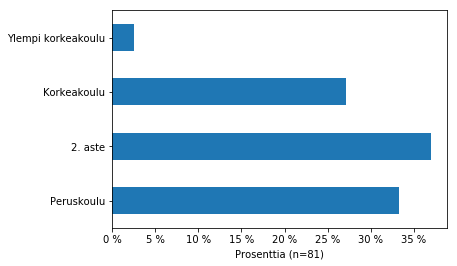

In [6]:
#vaakapylväskaavio prosenteista
ax1 = df1['%'].plot.barh()

#x-akselin otsikointi; n-arvo mukaan
n=df1['n'].sum()
ax1.set_xlabel('Prosenttia (n=' + str(n) + ')')

#x-akselin ticksien tuunaus
ax1.xaxis.set_major_formatter(myFmt100)

<h2>crosstab() laskee ristiintaulukoinnit</h2>



In [8]:
#ristiintaulukointi
df2 = pd.crosstab(df['koulutus'], df['sukup'])

#otsikot kuntoon:
df2.index = koulutus
df2.columns = sukup

df2

,Mies,Nainen
Peruskoulu,22,5
2. aste,23,7
Korkeakoulu,15,7
Ylempi korkeakoulu,2,0


In [9]:
#ristiintaulukointi, prosentit (normalize) sarakkeiden mukaan
df3 = pd.crosstab(df['koulutus'], df['sukup'], normalize = 'columns')

#rivi (index) -otsikot koulutus-listasta
df3.index = koulutus

#kikkailen n-arvot mukaan
miehet = df2['Mies'].sum()
naiset = df2['Nainen'].sum()
df3.columns = ['Mies (n=' + str(miehet) + ')','Nainen (n=' + str(naiset) + ')']

#loppusilaus
(df3*100).style.format('{:.1f} %')

,Mies (n=62),Nainen (n=19)
Peruskoulu,35.5 %,26.3 %
2. aste,37.1 %,36.8 %
Korkeakoulu,24.2 %,36.8 %
Ylempi korkeakoulu,3.2 %,0.0 %


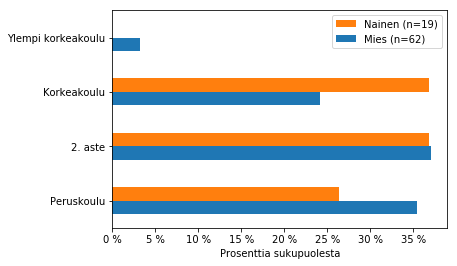

In [10]:
#edellinen pylväinä; legend='reverse' kääntää selitteen järjestyksen
ax2 = df3.plot.barh(legend='reverse')

ax2.set_xlabel('Prosenttia sukupuolesta')

#x-akselin ticksien tuunaus
ax2.xaxis.set_major_formatter(myFmt1)

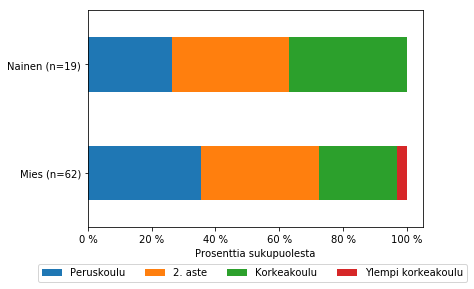

In [11]:
#edellinen 100 % pinottuina vaakapylväinä, T vaihtaa arvosarjat ja kategoriat päittäin
ax3 = df3.T.plot.barh(stacked = True)

ax3.set_xlabel('Prosenttia sukupuolesta')

#selitteen sijoittelu suhteessa origoon, selitteitä 4 vierekkäin
ax3.legend(loc=(-0.15, -0.25), ncol=4)
 
#x-akselin ticksien tuunaus
ax3.xaxis.set_major_formatter(myFmt1)

<h2>Useiden muuttujien frekvenssit yhteen taulukkoon</h2>

Tämän tekeminen esimerkiksi Excelillä on vaikeahkoa. Pythonissa tämä sujuu helposti <b>value_counts()</b>-funktion avustuksella.

In [12]:
#lasken lukumääriä value_counts()-funktiolla ja muutan tuloksen dataframeksi
df4 = df['johto'].value_counts(sort = False, normalize = True).to_frame()

#lisään dataframeen uusia sarakkeita
df4['työtov'] = df['työtov'].value_counts(sort = False, normalize = True)
df4['työymp'] = df['työymp'].value_counts(sort = False, normalize = True)
df4['palkkat'] = df['palkkat'].value_counts(sort = False, normalize = True)
df4['työteht'] = df['työteht'].value_counts(sort = False, normalize = True)

#riviotsikot aiemmin määritellystä tyytyväisyys-listasta
df4.index = tyytyväisyys

#loppusilaus
(df4*100).style.format('{:.1f} %')

,johto,työtov,työymp,palkkat,työteht
Erittäin tyytymätön,8.5 %,nan %,11.0 %,40.2 %,6.1 %
Jokseenkin tyytymätön,19.5 %,3.7 %,11.0 %,23.2 %,18.3 %
Ei tyytymätön eikä tyytyväinen,36.6 %,19.8 %,36.6 %,23.2 %,35.4 %
Jokseenkin tyytyväinen,28.0 %,43.2 %,28.0 %,12.2 %,30.5 %
Erittäin tyytyväinen,7.3 %,33.3 %,13.4 %,1.2 %,9.8 %


Seuraavassa määriteltävistä väreistä lisätietoa https://htmlcolorcodes.com/

Voit määrittää värit käyttäen värien nimiä tai hex-värikoodeja.

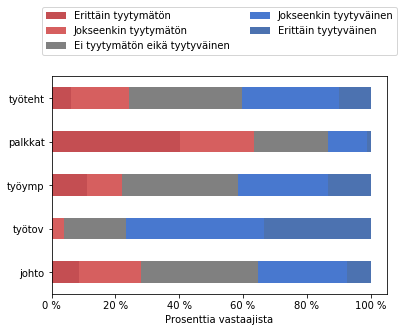

In [13]:
#Edellinen 100 % pylväinä
ax4 = df4.T.plot.barh(stacked = True, 
                    color=['#C44E52','#D65F5F','gray','#4878CF','#4C72B0'])

ax4.set_xlabel('Prosenttia vastaajista')

#selitteen sijainti; 2 selitettä vierekkäin
ax4.legend(loc=(-0.03, 1.1), ncol=2)

#x-akselin ticksien tuunaus
ax4.xaxis.set_major_formatter(myFmt1)

Matplotlib mahdollistaa monenlaisia toteutuksia. Seuraavassa laadin viiden kaavion yhdistelmän

- lisäparametrilla <b>subplots=True</b> määritän, että jokaisesta sarakkeesta oma kaavio
- lisäparametrilla <b>layout=(1, 5)</b> määritän, että kaaviot sijoitetaan 1 riville, 5 rinnakkain
- lisäparametreilla <b>sharex=True, sharey=True</b> määritän, että kaikilla kaavioilla on yhteiset akselit
- lisäparametrilla <b>figsize=(12, 2)</b> määritän kuvion koon
- lisäparametrilla <b>color='maroon'</b> määritän pylväiden väriksi maroon
- lisäparametrilla <b>legend=False</b> jätän kaavioista selitteet pois

Text(0.08, 0.5, '%')

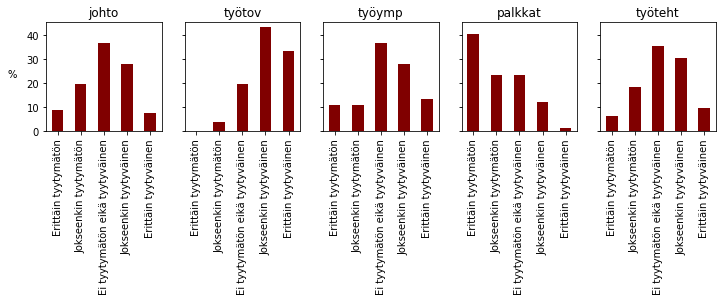

In [19]:
axes = (df4*100).plot.bar(subplots=True, layout=(1, 5), sharex=True, sharey=True, 
              figsize=(12, 2), color='maroon', legend=False)

#kuvio, jonka sisällä kaaviot sijaitsevat (gcf = get current figure)
fig = plt.gcf()
#%-merkki kuvion sijaintiin (0.08, 0.5)
fig.text(0.08, 0.5, "%")

<h2>count() laskee monivalintojen yhteenvedot</h2>

Monivalintojen yhteenveto sujuu esimerkiksi <b>count()</b>-funktiolla. count()-funktion tulos ei ole dataframe, mutta voin muuttaa sen dataframeksi. Samalla voin järjestää monivalinnan vaihtoehdot valintojen mukaiseen järjestykseen <b>sort_values</b>-funktiolla.

Voin ryhmitellä tuloskset toisen muuttujan, esimerkiksi sukupuolen, mukaan <b>groupby()</b>-funktion avulla.

In [20]:
#monivalintojen lukumäärät selviävät count()-funktiolla
df5=df[monivalinnat].count()

#muutan series-tyyppisen listan dataframeksi ja järjestän lukumäärien mukaiseen järjestykseen
df5 = df5.to_frame('n').sort_values(by = 'n', ascending = False)

In [21]:
#prosenttia vastaajien kokonaismäärästä (shape[0])
df5['% vastaajista'] = df5['n'] / df.shape[0]*100

#loppusilaus
df5.style.format({'% vastaajista':'{:.1f} %'})

,n,% vastaajista
työterv,47,57.3 %
hieroja,22,26.8 %
lomaosa,20,24.4 %
kuntosa,9,11.0 %


Text(0.5, 0, 'Käyttäjien lukumäärä')

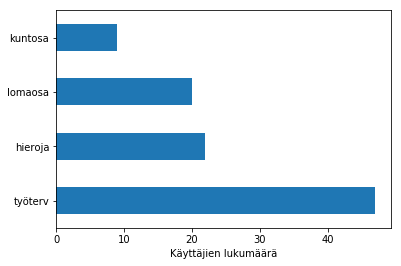

In [22]:
#edellinen pylväinä
ax5 = df5['n'].plot.barh(legend=False)

ax5.set_xlabel('Käyttäjien lukumäärä')

In [23]:
#monivalinnat sukupuolen mukaan
df6 = df.groupby('sukup')[monivalinnat].count()

#sukupuolet sukup-listasta, jonka määrittelin aiemmin
df6.index = sukup

df6

,työterv,lomaosa,kuntosa,hieroja
Mies,35,16,8,13
Nainen,12,4,1,9


In [24]:
#monivalinnat sukupuolen mukaan
df7 = df.groupby('sukup')[monivalinnat].count()

#miesten ja naisten lukumäärät
miehet = df['sukup'].value_counts()[1]
naiset = df['sukup'].value_counts()[2]

#prosentit
#iloc[0] viittaa indeksin mukaiselle 0-riville (miesten rivi)
df7.iloc[0] = df7.iloc[0] / miehet
df7.iloc[1] = df7.iloc[1] / naiset

#kikkailen n-arvot mukaan
df7.index = ['Mies (n=' + str(miehet) + ')' ,'Nainen (n=' + str(naiset) + ')']

#loppusilaus
(df7*100).style.format('{:.1f} %')

,työterv,lomaosa,kuntosa,hieroja
Mies (n=63),55.6 %,25.4 %,12.7 %,20.6 %
Nainen (n=19),63.2 %,21.1 %,5.3 %,47.4 %


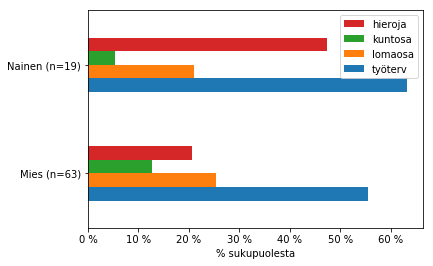

In [25]:
#edellinen pylväinä
ax7 = df7.plot.barh(legend='reverse')

ax7.set_xlabel('% sukupuolesta')

#x-akselin ticksien tuunaus
ax7.xaxis.set_major_formatter(myFmt1)

<h2>Luokiteltu jakauma</h2>

Pandas-kirjaston <b>cut</b>-funktiolla voin luokitella muuttujan. Oletuksena luokan yläraja kuuluu luokkaan. Lisäparametrilla <b>right=False</b> voin vaihtaa luokan alarajan kuulumaan luokkaan.

In [26]:
#määrittelen luokkarajat palkan luokittelemiseksi
bins = [1000, 2000, 3000, 4000, 7000]

#lisään dataan palkkaluokka-sarakkeen
df['palkkaluokka'] = pd.cut(df['palkka'], bins = bins).astype(str)

#palkkaluokkiin kuuluvien lukumäärät
df8 = pd.crosstab(df['palkkaluokka'], 'n')
df8.columns.name = ''

#prosentit
df8['%'] = df8/df8.sum()*100

#loppusilaus
df8.style.format({'%': '{:.1f} %'})

,n,%
palkkaluokka,,
"(1000, 2000]",19,23.2 %
"(2000, 3000]",50,61.0 %
"(3000, 4000]",8,9.8 %
"(4000, 7000]",5,6.1 %


Text(0, 0.5, 'lukumäärä')

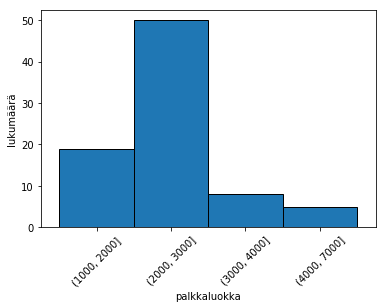

In [27]:
#edellinen kaaviona; width=1 laittaa pylväät kiinni toisiinsa
#rot=45 kääntää x-akselin ticksien nimiöitä 45 astetta
ax8 = df8['n'].plot.bar(width=1, rot=45, legend=False, edgecolor='black')

ax8.set_ylabel('lukumäärä')